In [59]:
#!/usr/bin/env python3
## import libraries
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import sys

# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

np.set_printoptions(suppress=True)

# specify
name = 'back6'

model_path = './saved model/500_data/prediction_not_fixed_' + name
model = load_model(model_path)

dataset_path = './datasets/split by random for distributed/prediction/' + name + '_test.csv'
dataset = pd.read_csv(dataset_path, header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)

def calculate_vis_hitting_point(arr):
    __hitting_point = -45
    if (-50 <= float(np.min(arr)) <= -45):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row,1]-arr[row-1,1])
        __vis_hitting_point = (1-w1)*arr[row,:] + w1*arr[row-1,:]
    elif (-45 < float(np.min(arr)) < -40):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row-1,1]-arr[row,1])
        __vis_hitting_point = arr[row,:] - w1*(arr[row-1,:]-arr[row,:])
    return __vis_hitting_point

def modify_input(arr):
    ka = np.array([0])
    for i in range(arr.shape[0]):
        if arr[i,] != 0:
            ka = np.hstack((ka,arr[i,]))
    ka = ka[1:,]
    return ka

hitting_point = -45
__hp = -45
err = np.zeros((1,3))
flag = True

for i in range(dataset.shape[0]):
    tmp = dataset[i,:] ## read trajectory
    ip = modify_input(tmp) ## remove zeros from pandas
    
    ## calculate vis hitting point
    ipp = ip.reshape(int(ip.shape[0]/3),3)
    if (-50 <= float(np.min(ipp)) <= -45):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row,1]-ipp[row-1,1])
        vis_hitting_point = (1-w1)*ipp[row,:] + w1*ipp[row-1,:]
    elif (-45 < float(np.min(ipp)) < -40):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row-1,1]-ipp[row,1])
        vis_hitting_point = ipp[row,:] - w1*(ipp[row-1,:]-ipp[row,:])
    print(vis_hitting_point)
    
    ## padding for model
    ip2 = sequence.pad_sequences(ip.reshape(1,ip.shape[0]), maxlen=ip.shape[0]+27, padding='post', dtype='float32')
    
    for i in range(0,(ip2.shape[1]-27),3):
        t = ip2[:,i:i+27]
        pred = model.predict(t.reshape(1,9,3), verbose=2)
        #print("input = \n", t.reshape(1,9,3))
        #print("output = \n", pred)
        if -55 < pred[0,0,1] < -45 and flag == True:
            #print(t[0,-3:])
            w = abs(__hp-t[0,-3:]) / abs(pred[0,0,1]-t[0,-3:])
            hp = w*pred[0,0,:] + (1-w)*t[0,-3:].reshape(1,3)
            print("pred hp a = \n", hp)
            flag = False
            #input()
        if -45 < pred[0,0,1] < -40 and flag == True:
            w = abs(__hp-pred[0,0,1]) / (pred[0,0,1]-t[0,-2])
            hp = pred[0,0,:] - w*(pred[0,0,:]-t[0,-3:])
            print("pred hp b = \n", hp)
            flag = False
            #input()
    flag = True
    error = vis_hitting_point - hp
    err = np.vstack((err, error))

[ 44.0925042  -45.          22.07972681]
pred hp b = 
 [ 45.414265 -45.        22.375372]
[ 74.48381757 -45.          25.87053397]
pred hp b = 
 [ 74.875114 -45.        26.621866]
[ 42.27426646 -45.          17.81797004]
pred hp b = 
 [ 42.441715 -45.        17.61644 ]
[ 87.82290747 -45.          21.39725253]
pred hp b = 
 [ 88.52108  -45.        20.307135]
[ 54.63311468 -45.          21.71424267]
pred hp b = 
 [ 55.03657 -45.       21.21672]
[ 92.92444086 -45.          20.17322166]
pred hp a = 
 [[ 93.16354  -45.        19.855923]]
[ 62.01265364 -45.          19.4274945 ]
pred hp a = 
 [[ 61.980286 -45.        19.793272]]
[ 64.64412647 -45.          22.28217418]
pred hp a = 
 [[ 64.69256 -45.       22.1588 ]]
[ 54.45938362 -45.          15.64353974]
pred hp b = 
 [ 55.277103 -45.        16.436224]
[104.71673352 -45.          12.76507081]
pred hp b = 
 [104.36011   -45.         12.3991585]
[111.48112571 -45.          18.90882014]
pred hp b = 
 [111.71005 -45.       19.8601 ]
[ 60.02950

pred hp b = 
 [ 90.6636   -45.        22.702312]
[102.44232965 -45.          20.97587356]
pred hp a = 
 [[103.10409 -45.       20.93431]]
[ 90.74667786 -45.          22.29377557]
pred hp a = 
 [[ 91.27183  -45.        22.088655]]
[ 53.08494704 -45.          21.62481001]
pred hp b = 
 [ 52.946663 -45.        21.265457]
[ 25.61215977 -45.          29.74080486]
pred hp b = 
 [ 25.038595 -45.        25.133535]
[100.50493213 -45.          15.62169711]
pred hp b = 
 [101.06522  -45.        16.337507]
[ 56.69218658 -45.          19.33599715]
pred hp b = 
 [ 56.98389  -45.        19.001333]
[ 73.39234248 -45.          24.08109412]
pred hp b = 
 [ 74.2318   -45.        25.660364]
[ 78.20643658 -45.          23.77546027]
pred hp b = 
 [ 78.56214  -45.        23.101915]
[ 50.3576761  -45.          17.55818077]
pred hp b = 
 [ 50.974155 -45.        17.477823]
[ 48.91031384 -45.          19.19966798]
pred hp b = 
 [ 48.43862 -45.       19.1279 ]
[ 81.49574158 -45.          18.53954337]
pred hp b = 

[ 73.71747543 -45.          16.56557025]
pred hp a = 
 [[ 74.274895 -45.        16.714676]]
[ 91.62265271 -45.          21.79677794]
pred hp a = 
 [[ 91.84355  -45.        21.774921]]
[ 97.0225578 -45.         20.4431029]
pred hp b = 
 [ 98.1035  -45.       20.14961]
[125.65549575 -45.          25.23922807]
pred hp b = 
 [123.492325 -45.        25.555868]
[ 41.18595759 -45.          17.68626779]
pred hp b = 
 [ 42.149334 -45.        18.43073 ]
[ 49.19797394 -45.          18.58283736]
pred hp a = 
 [[ 49.704987 -45.        18.592422]]
[ 78.41246173 -45.          22.49593203]
pred hp a = 
 [[ 78.38037  -45.        22.940563]]
[ 68.18020167 -45.          18.88149396]
pred hp b = 
 [ 69.09929  -45.        20.338837]
[ 73.04105614 -45.          17.12304584]
pred hp b = 
 [ 73.56281  -45.        17.481955]
[108.01074762 -45.          19.80528704]
pred hp b = 
 [108.62913  -45.        20.310827]
[ 79.13207373 -45.          18.58416654]
pred hp a = 
 [[ 79.20824  -45.        18.652405]]
[ 43.3

250
accuray = 100.0%


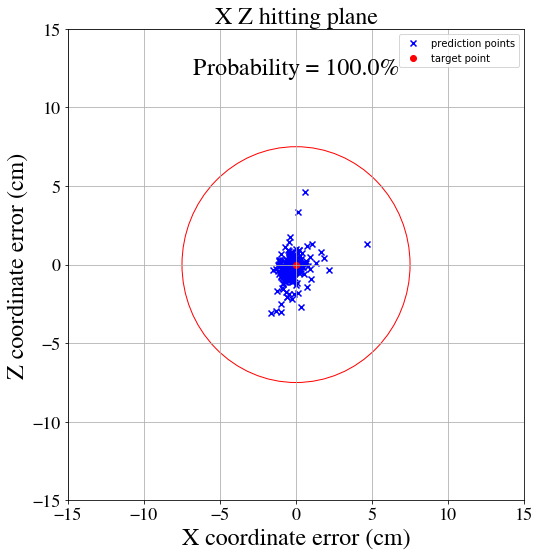

In [60]:
err2 = err[1:,:]
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
print(correct)
print("accuray = {}%".format(correct/err2.shape[0]*100))
text = str("Probability = {}%".format(correct/err2.shape[0]*100))

fig_path_svg = './pic/XZ_plane/'+name+'_test.svg'
fig_path_png = './pic/XZ_plane/'+name+'_test.png'

plt.figure(figsize=(8,8))

x = y = np.arange(-7.5, 7.5, 0.005)
x, y = np.meshgrid(x,y)
#plt.contour(x, y, x**2 + y**2, [15*15])
circle2 = plt.Circle((0, 0), 7.5, color='r', fill=False, label='paddle edge')

ax = plt.gca()
ax.add_artist(circle2)
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))


#plt.xlim((-15,15))
#plt.ylim((-15,15))

plt.scatter(err2[:,0], err2[:,2], edgecolors='b', label='prediction points', marker='x', color='b')
plt.scatter(0,0, color='r', marker='o', label='target point')
#plt.scatter(0,0,color='r', marker='o', facecolors='none', s=60000)
plt.Circle((0,0), 7.5, color='r', fill=False)
#plt.scatter(0,0, color='r', marker='o', facecolors='none')
#plt.ylim(-20,20)
plt.xlabel('X coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.ylabel('Z coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.xticks(fontsize=18, fontname='FreeSerif')
plt.yticks(fontsize=18, fontname='FreeSerif')
plt.grid(True)
plt.text(0,12.5,text, fontsize=24, fontname='FreeSerif', horizontalalignment='center', verticalalignment='center')
plt.tight_layout(pad=2.5)
plt.title('X Z hitting plane', fontsize=24, fontname='FreeSerif')
plt.legend()

plt.savefig('./pic/target comparison/'+name+'_independent.png')

In [61]:
# specify
#name = 'top5'

model_path = './saved model/500_data/prediction_not_fixed_all_kind_data'
model = load_model(model_path)

dataset_path = './datasets/split by random for distributed/prediction/' + name + '_test.csv'
dataset = pd.read_csv(dataset_path, header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)

def calculate_vis_hitting_point(arr):
    __hitting_point = -45
    if (-50 <= float(np.min(arr)) <= -45):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row,1]-arr[row-1,1])
        __vis_hitting_point = (1-w1)*arr[row,:] + w1*arr[row-1,:]
    elif (-45 < float(np.min(arr)) < -40):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row-1,1]-arr[row,1])
        __vis_hitting_point = arr[row,:] - w1*(arr[row-1,:]-arr[row,:])
    return __vis_hitting_point

def modify_input(arr):
    ka = np.array([0])
    for i in range(arr.shape[0]):
        if arr[i,] != 0:
            ka = np.hstack((ka,arr[i,]))
    ka = ka[1:,]
    return ka

hitting_point = -45
__hp = -45
err = np.zeros((1,3))
flag = True

for i in range(dataset.shape[0]):
    tmp = dataset[i,:] ## read trajectory
    ip = modify_input(tmp) ## remove zeros from pandas
    
    ## calculate vis hitting point
    ipp = ip.reshape(int(ip.shape[0]/3),3)
    if (-50 <= float(np.min(ipp)) <= -45):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row,1]-ipp[row-1,1])
        vis_hitting_point = (1-w1)*ipp[row,:] + w1*ipp[row-1,:]
    elif (-45 < float(np.min(ipp)) < -40):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row-1,1]-ipp[row,1])
        vis_hitting_point = ipp[row,:] - w1*(ipp[row-1,:]-ipp[row,:])
    print(vis_hitting_point)
    
    ## padding for model
    ip2 = sequence.pad_sequences(ip.reshape(1,ip.shape[0]), maxlen=ip.shape[0]+27, padding='post', dtype='float32')
    
    for i in range(0,(ip2.shape[1]-27),3):
        t = ip2[:,i:i+27]
        pred = model.predict(t.reshape(1,9,3), verbose=0)
        #print("input = \n", t.reshape(1,9,3))
        #print("output = \n", pred)
        if -55 < pred[0,0,1] < -45 and flag == True:
            #print(t[0,-3:])
            w = abs(__hp-t[0,-3:]) / abs(pred[0,0,1]-t[0,-3:])
            hp = w*pred[0,0,:] + (1-w)*t[0,-3:].reshape(1,3)
            print("pred hp a = \n", hp)
            flag = False
            #input()
        if -45 < pred[0,0,1] < -40 and flag == True:
            w = abs(__hp-pred[0,0,1]) / (pred[0,0,1]-t[0,-2])
            hp = pred[0,0,:] - w*(pred[0,0,:]-t[0,-3:])
            print("pred hp b = \n", hp)
            flag = False
            #input()
    flag = True
    error = vis_hitting_point - hp
    err = np.vstack((err, error))

[ 44.0925042  -45.          22.07972681]
pred hp b = 
 [ 44.213444 -45.        22.081743]
[ 74.48381757 -45.          25.87053397]
pred hp b = 
 [ 74.2208   -45.        26.387285]
[ 42.27426646 -45.          17.81797004]
pred hp b = 
 [ 42.40178 -45.       18.89049]
[ 87.82290747 -45.          21.39725253]
pred hp b = 
 [ 87.74912  -45.        20.178452]
[ 54.63311468 -45.          21.71424267]
pred hp b = 
 [ 55.570427 -45.        21.574432]
[ 92.92444086 -45.          20.17322166]
pred hp a = 
 [[ 93.61405  -45.        19.760622]]
[ 62.01265364 -45.          19.4274945 ]
pred hp b = 
 [ 62.56835  -45.        19.074585]
[ 64.64412647 -45.          22.28217418]
pred hp b = 
 [ 65.40069  -45.        22.871403]
[ 54.45938362 -45.          15.64353974]
pred hp a = 
 [[ 55.72165  -45.        17.214958]]
[104.71673352 -45.          12.76507081]
pred hp b = 
 [104.0985   -45.        13.162849]
[111.48112571 -45.          18.90882014]
pred hp b = 
 [111.27743  -45.        17.278336]
[ 60.0295

pred hp b = 
 [ 88.71642 -45.       23.96509]
[102.44232965 -45.          20.97587356]
pred hp a = 
 [[102.08716 -45.       21.05166]]
[ 90.74667786 -45.          22.29377557]
pred hp a = 
 [[ 91.16532  -45.        21.964954]]
[ 53.08494704 -45.          21.62481001]
pred hp b = 
 [ 53.671608 -45.        21.600517]
[ 25.61215977 -45.          29.74080486]
pred hp b = 
 [ 23.972845 -45.        26.349497]
[100.50493213 -45.          15.62169711]
pred hp a = 
 [[ 99.44897  -45.        14.007824]]
[ 56.69218658 -45.          19.33599715]
pred hp b = 
 [ 56.409912 -45.        19.694946]
[ 73.39234248 -45.          24.08109412]
pred hp a = 
 [[ 72.659256 -45.        23.63804 ]]
[ 78.20643658 -45.          23.77546027]
pred hp b = 
 [ 78.60105  -45.        23.538942]
[ 50.3576761  -45.          17.55818077]
pred hp a = 
 [[ 51.024452 -45.        18.297348]]
[ 48.91031384 -45.          19.19966798]
pred hp b = 
 [ 48.907227 -45.        19.02335 ]
[ 81.49574158 -45.          18.53954337]
pred h

[ 73.71747543 -45.          16.56557025]
pred hp a = 
 [[ 74.58872  -45.        16.764091]]
[ 91.62265271 -45.          21.79677794]
pred hp a = 
 [[ 90.60875  -45.        21.374079]]
[ 97.0225578 -45.         20.4431029]
pred hp b = 
 [ 96.009605 -45.        19.753983]
[125.65549575 -45.          25.23922807]
pred hp b = 
 [120.219154 -45.        25.543036]
[ 41.18595759 -45.          17.68626779]
pred hp b = 
 [ 40.68161  -45.        17.859629]
[ 49.19797394 -45.          18.58283736]
pred hp a = 
 [[ 49.42705 -45.       18.98498]]
[ 78.41246173 -45.          22.49593203]
pred hp a = 
 [[ 79.32064  -45.        24.289839]]
[ 68.18020167 -45.          18.88149396]
pred hp b = 
 [ 69.93478  -45.        21.239264]
[ 73.04105614 -45.          17.12304584]
pred hp b = 
 [ 73.85575  -45.        17.023157]
[108.01074762 -45.          19.80528704]
pred hp b = 
 [106.798134 -45.        19.741117]
[ 79.13207373 -45.          18.58416654]
pred hp a = 
 [[ 80.62472  -45.        18.528963]]
[ 43.3

249
accuray = 99.6%


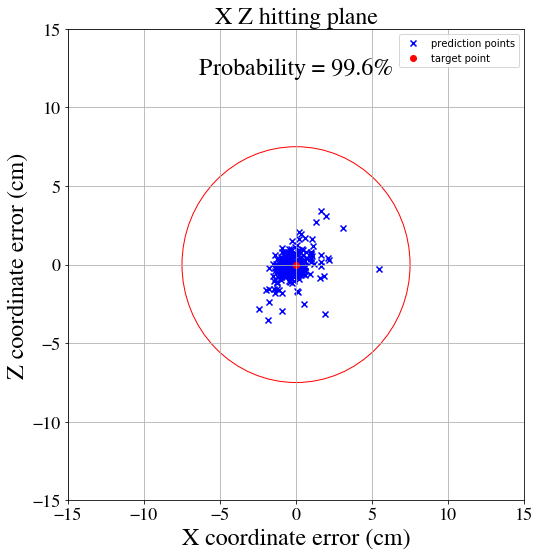

In [62]:
err2 = err[1:,:]
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
print(correct)
print("accuray = {}%".format(correct/err2.shape[0]*100))
text = str("Probability = {}%".format(correct/err2.shape[0]*100))

fig_path_svg = './pic/XZ_plane/'+name+'_test.svg'
fig_path_png = './pic/XZ_plane/'+name+'_test.png'

plt.figure(figsize=(8,8))

x = y = np.arange(-7.5, 7.5, 0.005)
x, y = np.meshgrid(x,y)
#plt.contour(x, y, x**2 + y**2, [15*15])
circle2 = plt.Circle((0, 0), 7.5, color='r', fill=False, label='paddle edge')

ax = plt.gca()
ax.add_artist(circle2)
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))


#plt.xlim((-15,15))
#plt.ylim((-15,15))

plt.scatter(err2[:,0], err2[:,2], edgecolors='b', label='prediction points', marker='x', color='b')
plt.scatter(0,0, color='r', marker='o', label='target point')
#plt.scatter(0,0,color='r', marker='o', facecolors='none', s=60000)
plt.Circle((0,0), 7.5, color='r', fill=False)
#plt.scatter(0,0, color='r', marker='o', facecolors='none')
#plt.ylim(-20,20)
plt.xlabel('X coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.ylabel('Z coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.xticks(fontsize=18, fontname='FreeSerif')
plt.yticks(fontsize=18, fontname='FreeSerif')
plt.grid(True)
plt.text(0,12.5,text, fontsize=24, fontname='FreeSerif', horizontalalignment='center', verticalalignment='center')
plt.tight_layout(pad=2.5)
plt.title('X Z hitting plane', fontsize=24, fontname='FreeSerif')
plt.legend()

plt.savefig('./pic/target comparison/'+name+'_all_data.png')

In [63]:
# specify
#name = 'top5'

model_path = './saved model/500_data/prediction_not_fixed_bidirection_all_kind_data'
model = load_model(model_path)

dataset_path = './datasets/split by random for distributed/prediction/' + name + '_test.csv'
dataset = pd.read_csv(dataset_path, header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)

def calculate_vis_hitting_point(arr):
    __hitting_point = -45
    if (-50 <= float(np.min(arr)) <= -45):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row,1]-arr[row-1,1])
        __vis_hitting_point = (1-w1)*arr[row,:] + w1*arr[row-1,:]
    elif (-45 < float(np.min(arr)) < -40):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row-1,1]-arr[row,1])
        __vis_hitting_point = arr[row,:] - w1*(arr[row-1,:]-arr[row,:])
    return __vis_hitting_point

def modify_input(arr):
    ka = np.array([0])
    for i in range(arr.shape[0]):
        if arr[i,] != 0:
            ka = np.hstack((ka,arr[i,]))
    ka = ka[1:,]
    return ka

hitting_point = -45
__hp = -45
err = np.zeros((1,3))
flag = True

for i in range(dataset.shape[0]):
    tmp = dataset[i,:] ## read trajectory
    ip = modify_input(tmp) ## remove zeros from pandas
    
    ## calculate vis hitting point
    ipp = ip.reshape(int(ip.shape[0]/3),3)
    if (-50 <= float(np.min(ipp)) <= -45):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row,1]-ipp[row-1,1])
        vis_hitting_point = (1-w1)*ipp[row,:] + w1*ipp[row-1,:]
    elif (-45 < float(np.min(ipp)) < -40):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row-1,1]-ipp[row,1])
        vis_hitting_point = ipp[row,:] - w1*(ipp[row-1,:]-ipp[row,:])
    print(vis_hitting_point)
    
    ## padding for model
    ip2 = sequence.pad_sequences(ip.reshape(1,ip.shape[0]), maxlen=ip.shape[0]+27, padding='post', dtype='float32')
    
    for i in range(0,(ip2.shape[1]-27),3):
        t = ip2[:,i:i+27]
        pred = model.predict(t.reshape(1,9,3), verbose=2)
        #print("input = \n", t.reshape(1,9,3))
        #print("output = \n", pred)
        if -55 < pred[0,0,1] < -45 and flag == True:
            #print(t[0,-3:])
            w = abs(__hp-t[0,-3:]) / abs(pred[0,0,1]-t[0,-3:])
            hp = w*pred[0,0,:] + (1-w)*t[0,-3:].reshape(1,3)
            print("pred hp a = \n", hp)
            flag = False
            #input()
        if -45 < pred[0,0,1] < -40 and flag == True:
            w = abs(__hp-pred[0,0,1]) / (pred[0,0,1]-t[0,-2])
            hp = pred[0,0,:] - w*(pred[0,0,:]-t[0,-3:])
            print("pred hp b = \n", hp)
            flag = False
            #input()
    flag = True
    error = vis_hitting_point - hp
    err = np.vstack((err, error))

[ 44.0925042  -45.          22.07972681]
pred hp b = 
 [ 47.045902 -45.        21.705809]
[ 74.48381757 -45.          25.87053397]
pred hp a = 
 [[ 74.19185  -45.        24.155333]]
[ 42.27426646 -45.          17.81797004]
pred hp b = 
 [ 42.132523 -45.        17.65322 ]
[ 87.82290747 -45.          21.39725253]
pred hp b = 
 [ 89.91957  -45.        22.201893]
[ 54.63311468 -45.          21.71424267]
pred hp a = 
 [[ 55.063457 -45.        22.290545]]
[ 92.92444086 -45.          20.17322166]
pred hp a = 
 [[ 89.27853  -45.        22.561346]]
[ 62.01265364 -45.          19.4274945 ]
pred hp b = 
 [ 60.922634 -45.        16.035818]
[ 64.64412647 -45.          22.28217418]
pred hp a = 
 [[ 63.57382  -45.        21.594389]]
[ 54.45938362 -45.          15.64353974]
pred hp a = 
 [[ 55.476074 -45.        17.071205]]
[104.71673352 -45.          12.76507081]
pred hp b = 
 [109.0449 -45.      14.1647]
[111.48112571 -45.          18.90882014]
pred hp a = 
 [[125.58587  -45.        23.818657]]
[ 60

pred hp b = 
 [ 91.49427  -45.        23.248314]
[ 53.08494704 -45.          21.62481001]
pred hp a = 
 [[ 48.302414 -45.        21.541368]]
[ 25.61215977 -45.          29.74080486]
pred hp b = 
 [ 20.096235 -45.        25.258226]
[100.50493213 -45.          15.62169711]
pred hp a = 
 [[102.67807  -45.        15.800789]]
[ 56.69218658 -45.          19.33599715]
pred hp b = 
 [ 56.02812  -45.        20.657297]
[ 73.39234248 -45.          24.08109412]
pred hp a = 
 [[ 73.8246   -45.        23.222942]]
[ 78.20643658 -45.          23.77546027]
[ 50.3576761  -45.          17.55818077]
pred hp a = 
 [[ 50.832504 -45.        18.303947]]
[ 48.91031384 -45.          19.19966798]
pred hp a = 
 [[ 48.284595 -45.        17.752424]]
[ 81.49574158 -45.          18.53954337]
pred hp a = 
 [[ 79.2801   -45.        17.533848]]
[ 47.18816593 -45.          17.50310637]
pred hp b = 
 [ 46.702972 -45.        19.331493]
[ 94.31842005 -45.          17.84703918]
pred hp b = 
 [ 96.13804  -45.        16.181778

pred hp b = 
 [ 42.698536 -45.        13.525869]
[ 78.41246173 -45.          22.49593203]
pred hp a = 
 [[ 77.402176 -45.        22.103294]]
[ 68.18020167 -45.          18.88149396]
pred hp b = 
 [ 68.70293  -45.        21.976112]
[ 73.04105614 -45.          17.12304584]
pred hp b = 
 [ 73.13706  -45.        17.498974]
[108.01074762 -45.          19.80528704]
[ 79.13207373 -45.          18.58416654]
pred hp a = 
 [[ 77.10422 -45.       17.44569]]
[ 43.33137081 -45.          21.66592994]
pred hp b = 
 [ 42.395676 -45.        21.063381]
[ 77.26321684 -45.          16.49788828]
pred hp a = 
 [[ 69.258545 -45.        16.533697]]
[ 75.47648849 -45.          19.90080711]
pred hp b = 
 [ 76.722206 -45.        19.799475]
[ 55.87895871 -45.          22.97790868]
pred hp a = 
 [[ 54.414963 -45.        21.79776 ]]
[ 64.40109954 -45.          16.76923479]
pred hp a = 
 [[ 64.76569 -45.       17.53577]]
[ 57.39642925 -45.          20.33458351]
pred hp a = 
 [[ 53.920364 -45.        16.824492]]
[ 48

239
accuray = 95.6%


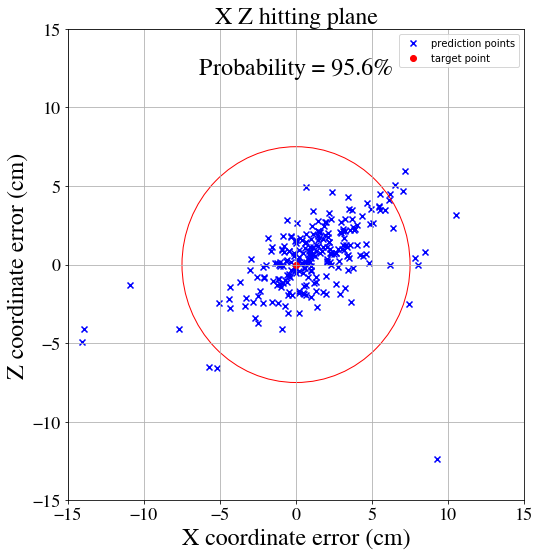

In [64]:
err2 = err[1:,:]
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
print(correct)
print("accuray = {}%".format(correct/err2.shape[0]*100))
aa = np.round_(correct/err2.shape[0]*100, 1)

text = str("Probability = {}%".format(aa))

fig_path_svg = './pic/XZ_plane/'+name+'_test.svg'
fig_path_png = './pic/XZ_plane/'+name+'_test.png'

plt.figure(figsize=(8,8))

x = y = np.arange(-7.5, 7.5, 0.005)
x, y = np.meshgrid(x,y)
#plt.contour(x, y, x**2 + y**2, [15*15])
circle2 = plt.Circle((0, 0), 7.5, color='r', fill=False, label='paddle edge')

ax = plt.gca()
ax.add_artist(circle2)
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))


#plt.xlim((-15,15))
#plt.ylim((-15,15))

plt.scatter(err2[:,0], err2[:,2], edgecolors='b', label='prediction points', marker='x', color='b')
plt.scatter(0,0, color='r', marker='o', label='target point')
#plt.scatter(0,0,color='r', marker='o', facecolors='none', s=60000)
plt.Circle((0,0), 7.5, color='r', fill=False)
#plt.scatter(0,0, color='r', marker='o', facecolors='none')
#plt.ylim(-20,20)
plt.xlabel('X coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.ylabel('Z coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.xticks(fontsize=18, fontname='FreeSerif')
plt.yticks(fontsize=18, fontname='FreeSerif')
plt.grid(True)
plt.text(0,12.5,text, fontsize=24, fontname='FreeSerif', horizontalalignment='center', verticalalignment='center')
plt.tight_layout(pad=2.5)
plt.title('X Z hitting plane', fontsize=24, fontname='FreeSerif')
plt.legend()

plt.savefig('./pic/target comparison/'+name+'_all_data_bidir.png')